#**Diabetes Patients**

**Description:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset.

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset

df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#column names

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#checking null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking NAN values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: title={'center': 'Distribution of BMI'}, xlabel='BMI', ylabel='Density'>

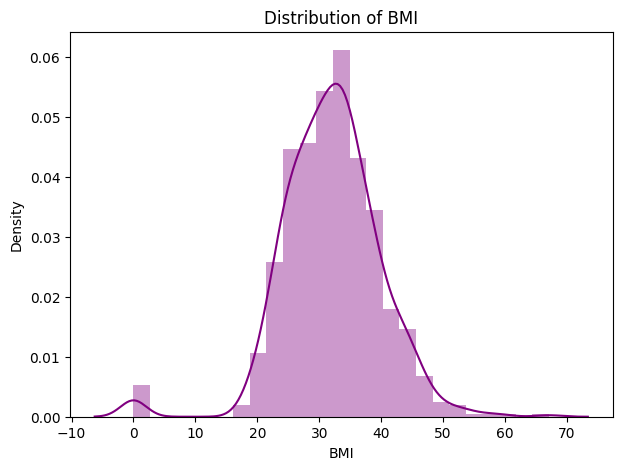

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution of BMI")
sns.distplot(df['BMI'],bins=25,color='purple')

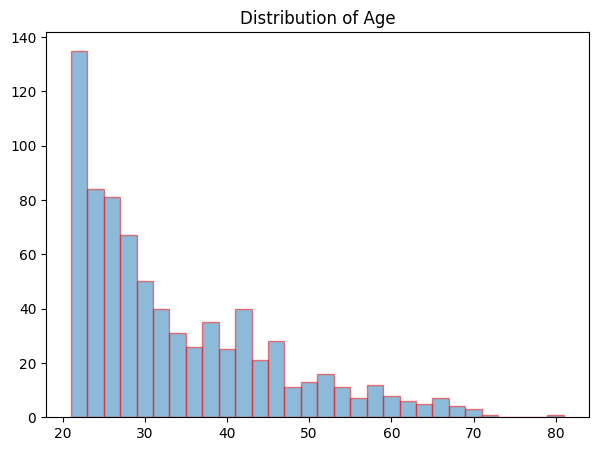

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Distribution of Age")
plt.hist(df['Age'],bins=30,alpha=0.5,edgecolor='red')
plt.show()

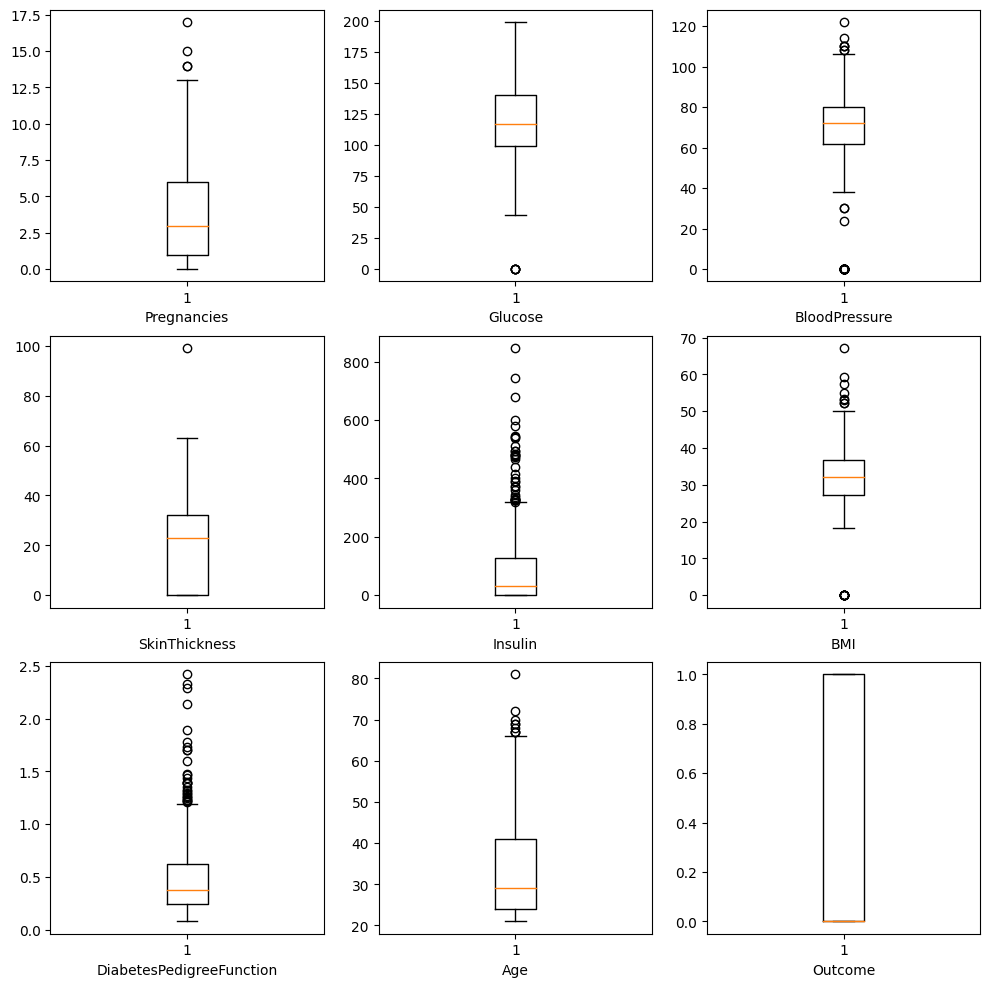

In [ ]:
plt.figure(figsize=(12,12))
for i, column in enumerate(df,1):
    plt.subplot(3,3,i)
    plt.boxplot(df[column])
    plt.xlabel(column)

<Axes: title={'center': 'Outcome'}, xlabel='Outcome', ylabel='count'>

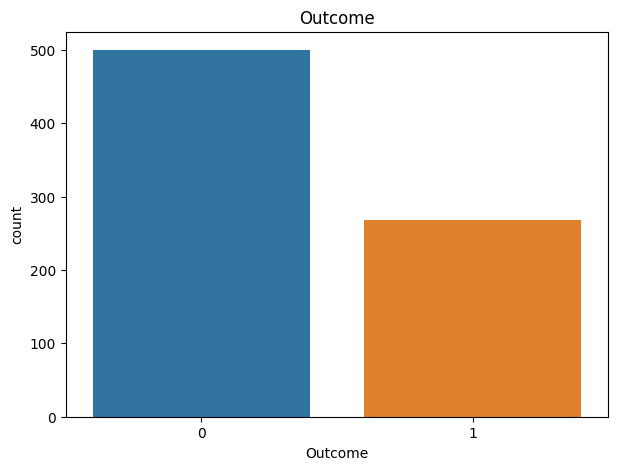

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Outcome")
sns.countplot(data=df,x='Outcome')

In [ ]:
a=df.corr()
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

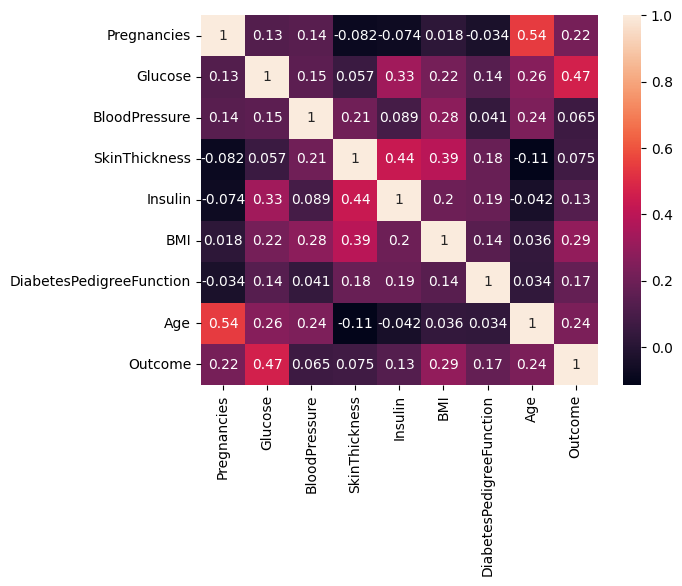

In [ ]:
sns.heatmap(a,annot=True)

In [ ]:
#assining variables

x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
#split the data set into train and test data i.e 80:20

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
#transforming into standardscaler

sc=preprocessing.StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)
y_train=y_train.ravel()

**Logisticregression model**

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy_score=",round(100 * accuracy_score(y_test,y_pred),2),"%")

accuracy_score= 76.62 %


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[96 13]
 [23 22]]


**Checking for overfitting and underfitting**

In [ ]:
y_pred5=model.predict(x_train)
print("accuracy_score=",round(100 * accuracy_score(y_train,y_pred5),2),"%")

accuracy_score= 78.01 %


You can see here overfitting is not there both the train and test data accuracy are similar

**DecisionTreeClassifier using gini criterion**

In [ ]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=2)
tree.fit(x_train,y_train)
y_pred1=tree.predict(x_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
print("accuracy_score=",round(100 * accuracy_score(y_test,y_pred1),2),"%")

accuracy_score= 75.32 %


In [ ]:
print(confusion_matrix(y_test,y_pred1))

[[91 18]
 [20 25]]


**DecisionTreeClassifier using entropy criterion**

In [ ]:

tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=2)
tree.fit(x_train,y_train)
y_pred2=tree.predict(x_test)
print("accuracy_score=",round(100 * accuracy_score(y_test,y_pred2),2),"%")

accuracy_score= 73.38 %


In [ ]:
print(confusion_matrix(y_test,y_pred2))

[[88 21]
 [20 25]]


GaussianNB Naive Bayes

In [ ]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred3=gb.predict(x_test)
print("accuracy_score=",round(100 * accuracy_score(y_test,y_pred3),2),"%")

accuracy_score= 75.97 %


In [ ]:
print(confusion_matrix(y_test,y_pred3))

[[93 16]
 [21 24]]


**RandomForest Classifier**

In [ ]:
random_clf=RandomForestClassifier(random_state=2,max_depth=2)
random_clf.fit(x_train,y_train)
y_pred4=random_clf.predict(x_test)
print("accuracy_score=",round(100 * accuracy_score(y_test,y_pred4),2),"%")

accuracy_score= 78.57 %


In [ ]:
conf_mat=confusion_matrix(y_test,y_pred4)
print(conf_mat)

[[104   5]
 [ 28  17]]


Text(107.22222222222227, 0.5, 'Predict label')

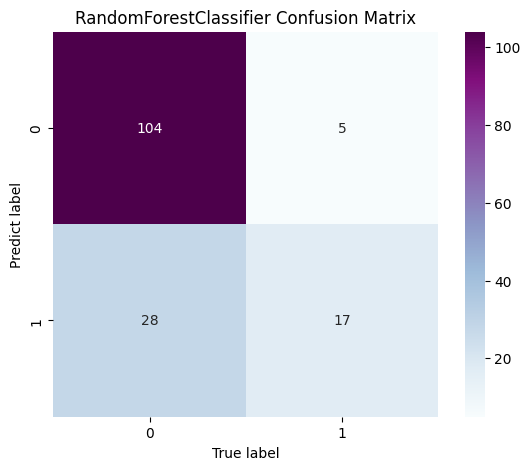

In [ ]:
plt.figure(figsize=(7,5))
plt.title("RandomForestClassifier Confusion Matrix")
sns.heatmap(conf_mat,annot=True,square=True,cmap='BuPu',fmt='d')
plt.xlabel('True label')
plt.ylabel('Predict label')

#**Result:**The more accuracy comes from RandomForestClassifier. It gives 78.15% accuracy.